In [251]:
import os
import pandas as pd

In [252]:
SCRIPT_DIR = os.path.dirname(os.getcwd())
print(f'SCRIPT_DIR {SCRIPT_DIR}')

SCRIPT_DIR /usr/WS2/iopp/software/tailorfs/scripts


In [253]:
motivation_csv = f'{SCRIPT_DIR}/paper_motivation.csv'
print(f'motivation_csv {motivation_csv}')

motivation_csv /usr/WS2/iopp/software/tailorfs/scripts/paper_motivation.csv


In [254]:
df = pd.read_csv(motivation_csv)

In [255]:
df.head()

,nodes,iter,rs,init,fini,open,close,write,read,flush,prefetch,interface,workload,storage,access_pattern,file_sharing,process_grouping
0,1,1024,1048576,0.0,0.0,0.000103,0.000034,0.259533,0.000000,1.043159,0.000000,POSIX,wo,0,0,0,0
1,1,1024,1048576,0.0,0.0,0.000067,0.000156,0.278429,0.000000,1.013136,0.000000,STDIO,wo,0,0,0,0
2,1,1024,1048576,0.0,0.0,0.013094,0.002353,0.273844,0.000000,0.930807,0.000000,MPIIO,wo,0,0,0,0
3,1,1024,1048576,0.0,0.0,0.000032,0.000008,0.000000,0.114583,0.000000,3.093808,POSIX,ro,0,0,0,0
4,1,1024,1048576,0.0,0.0,0.000038,0.000035,0.000000,0.119423,0.000000,3.269180,STDIO,ro,0,0,0,0


In [256]:
df.groupby(['workload', 'storage', 'access_pattern', 'file_sharing', 'process_grouping', 'interface']).count()

nodes  \
workload storage access_pattern file_sharing process_grouping interface          
  ro     0       0              0            0                  MPIIO        8   
                                                                POSIX        8   
                                                                STDIO        8   
                 1              0            0                  MPIIO        8   
                                                                POSIX        8   
...                                                                        ...   
worm     2       1              0            0                  POSIX        8   
                                                                STDIO        8   
                                             1                  MPIIO       16   
                                                                POSIX       16   
                                                                STDIO       16   

                                                                         iter  \
workload storage access_pattern file_sharing process_grouping interface         
  ro     0       0              0            0                  MPIIO       8   
                                                                POSIX       8   
                                                                STDIO       8   
                 1              0            0                  MPIIO       8   
                                                                POSIX       8   
...                                                                       ...   
worm     2       1              0            0                  POSIX       8   
                                                                STDIO       8   
                                             1                  MPIIO      16   
                                                                POSIX      16   
                                                                STDIO      16   

                                                                         rs  \
workload storage access_pattern file_sharing process_grouping interface       
  ro     0       0              0            0                  MPIIO     8   
                                                                POSIX     8   
                                                                STDIO     8   
                 1              0            0                  MPIIO     8   
                                                                POSIX     8   
...                                                                      ..   
worm     2       1              0            0                  POSIX     8   
                                                                STDIO     8   
                                             1                  MPIIO    16   
                                                                POSIX    16   
                                                                STDIO    16   

                                                                         init  \
workload storage access_pattern file_sharing process_grouping interface         
  ro     0       0              0            0                  MPIIO       8   
                                                                POSIX       8   
                                                                STDIO       8   
                 1              0            0                  MPIIO       8   
                                                                POSIX       8   
...                                                                       ...   
worm     2       1              0            0                  POSIX       8   
                                                                STDIO       8   
                                             1                  MPIIO      16   
                                 

In [257]:
benefit_csv = f'{SCRIPT_DIR}/paper_benefit.csv'
print(f'benefit_csv {benefit_csv}')

benefit_csv /usr/WS2/iopp/software/tailorfs/scripts/paper_benefit.csv


In [258]:
df = pd.read_csv(benefit_csv)

In [259]:
df['io_time'] = df['write'] + df['read']

In [260]:
df.head()

,nodes,iter,rs,init,fini,open,close,write,read,interface,workload,storage,access_pattern,file_sharing,process_grouping,solution,io_time
0,1,1024,1048576,0.0,0.0,0.004837,0.973039,0.270431,0.000000,POSIX,wo,1,0,0,0,tailorfs,0.270431
1,1,1024,1048576,0.0,0.0,3.056769,0.041133,0.000000,0.127915,POSIX,ro,1,0,0,0,tailorfs,0.127915
2,1,1024,1048576,0.0,0.0,3.149002,1.967417,0.278873,0.149655,POSIX,raw,1,0,0,0,tailorfs,0.428528
3,1,1024,1048576,0.0,0.0,0.493340,0.519856,0.137713,0.121388,POSIX,raw,1,0,0,1,tailorfs,0.259101
4,1,1024,1048576,0.0,0.0,0.023276,0.019079,0.414785,0.581516,POSIX,raw,1,0,0,2,tailorfs,0.996301


In [261]:
df[df['nodes'] == 1]

,nodes,iter,rs,init,fini,open,close,write,read,interface,workload,storage,access_pattern,file_sharing,process_grouping,solution,io_time
0,1,1024,1048576,0.0,0.0,0.004837,0.973039,0.270431,0.000000,POSIX,wo,1,0,0,0,tailorfs,0.270431
1,1,1024,1048576,0.0,0.0,3.056769,0.041133,0.000000,0.127915,POSIX,ro,1,0,0,0,tailorfs,0.127915
2,1,1024,1048576,0.0,0.0,3.149002,1.967417,0.278873,0.149655,POSIX,raw,1,0,0,0,tailorfs,0.428528
3,1,1024,1048576,0.0,0.0,0.493340,0.519856,0.137713,0.121388,POSIX,raw,1,0,0,1,tailorfs,0.259101
4,1,1024,1048576,0.0,0.0,0.023276,0.019079,0.414785,0.581516,POSIX,raw,1,0,0,2,tailorfs,0.996301
5,1,1024,1048576,0.0,0.0,0.008555,0.000299,1.125497,0.000000,POSIX,up,1,0,0,0,tailorfs,1.125497
6,1,1024,1048576,0.0,0.0,2.966544,1.636769,0.554098,0.172643,POSIX,worm,1,0,0,0,tailorfs,0.726741
7,1,1024,1048576,0.0,0.0,0.471022,0.520004,0.246698,0.123088,POSIX,worm,1,0,0,1,tailorfs,0.369786
8,1,1024,1048576,0.0,0.0,0.021552,0.017084,0.447004,0.376477,POSIX,worm,1,0,0,2,tailorfs,0.823481
72,1,1024,1048576,0.0,0.0,0.010946,0.000486,1.104770,0.000000,POSIX,wo,1,0,0,0,baseline,1.104770


In [262]:
main_df = df[['nodes','workload', 'storage', 'access_pattern', 'file_sharing', 'process_grouping','solution','io_time']]

In [263]:
main_df['tailorfs']=0.0
main_df['baseline']=0.0

/var/tmp/ipykernel_140137/3130729269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['tailorfs']=0.0
/var/tmp/ipykernel_140137/3130729269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['baseline']=0.0


In [264]:
main_df['tailorfs'] = main_df['tailorfs'].mask(main_df['solution'] == 'tailorfs', main_df['io_time'], axis =0)
main_df['baseline'] = main_df['baseline'].mask(main_df['solution'] == 'baseline', main_df['io_time'], axis =0)

/var/tmp/ipykernel_140137/1365866482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['tailorfs'] = main_df['tailorfs'].mask(main_df['solution'] == 'tailorfs', main_df['io_time'], axis =0)
/var/tmp/ipykernel_140137/1365866482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['baseline'] = main_df['baseline'].mask(main_df['solution'] == 'baseline', main_df['io_time'], axis =0)


In [265]:
final_df = main_df.groupby(['nodes','workload', 'storage', 'access_pattern', 'file_sharing', 'process_grouping'])['nodes','tailorfs', 'baseline','workload'].agg({'nodes':min,'tailorfs':sum, 'baseline':sum})

/var/tmp/ipykernel_140137/2247455393.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df = main_df.groupby(['nodes','workload', 'storage', 'access_pattern', 'file_sharing', 'process_grouping'])['nodes','tailorfs', 'baseline','workload'].agg({'nodes':min,'tailorfs':sum, 'baseline':sum})


In [266]:
final_df['improvement'] = final_df['baseline']/final_df['tailorfs']

In [267]:
final_df

nodes  \
nodes workload storage access_pattern file_sharing process_grouping          
1     raw      1       0              0            0                     1   
                                                   1                     1   
                                                   2                     1   
      ro       1       0              0            0                     1   
      up       1       0              0            0                     1   
...                                                                    ...   
128   up       1       0              0            0                   128   
      wo       1       0              0            0                   128   
      worm     1       0              0            0                   128   
                                                   1                   128   
                                                   2                   128   

                                                                     tailorfs  \
nodes workload storage access_pattern file_sharing process_grouping             
1     raw      1       0              0            0                 0.428528   
                                                   1                 0.259101   
                                                   2                 0.996301   
      ro       1       0              0            0                 0.127915   
      up       1       0              0            0                 1.125497   
...                                                                       ...   
128   up       1       0              0            0                 7.078999   
      wo       1       0              0            0                 0.164918   
      worm     1       0              0            0                 0.373143   
                                                   1                 0.487418   
                                                   2                 1.003094   

                                                                      baseline  \
nodes workload storage access_pattern file_sharing process_grouping              
1     raw      1       0              0            0                  2.346551   
                                                   1                  0.993211   
                                                   2                  0.995437   
      ro       1       0              0            0                  1.119638   
      up       1       0              0            0                  1.139014   
...                                                                        ...   
128   up       1       0              0            0                  8.589640   
      wo       1       0              0            0                  7.680891   
      worm     1       0              0            0                 11.973646   
                                                   1                 10.487514   
                                                   2                  4.224318   

                                                                     improvement  
nodes workload storage access_pattern file_sharing process_grouping               
1     raw      1       0              0            0                    5.475841  
                                                   1                    3.833297  
                                                   2                    0.999133  
      ro       1       0              0            0                    8.752984  
      up       1       0              0            0                    1.012010  
...                                                                          ...  
128   up       1       0              0            0                    1.213398  
      wo       1       0              0            0                   46.574000  
      worm     1       0              0            0                   32.088626  
                    

In [275]:
final_df.index.unique(level=5)

Int64Index([0, 1, 2], dtype='int64', name='process_grouping')

In [268]:
workloads = final_df.index.unique(level=1)

In [285]:
final_df.loc[(slice(None), ["raw"],slice(None), slice(None),slice(None),[1])]

,,,,,,nodes,tailorfs,baseline,improvement
nodes,workload,storage,access_pattern,file_sharing,process_grouping,,,,
1,raw,1,0,0,1,1,0.259101,0.993211,3.833297
2,raw,1,0,0,1,2,0.438876,2.546018,5.801224
4,raw,1,0,0,1,4,0.432216,1.581962,3.660119
8,raw,1,0,0,1,8,0.386721,2.179299,5.635326
16,raw,1,0,0,1,16,0.387605,1.605871,4.143061
32,raw,1,0,0,1,32,0.373368,2.205295,5.906492
64,raw,1,0,0,1,64,0.322452,3.077928,9.545383
128,raw,1,0,0,1,128,0.275465,5.795124,21.037606


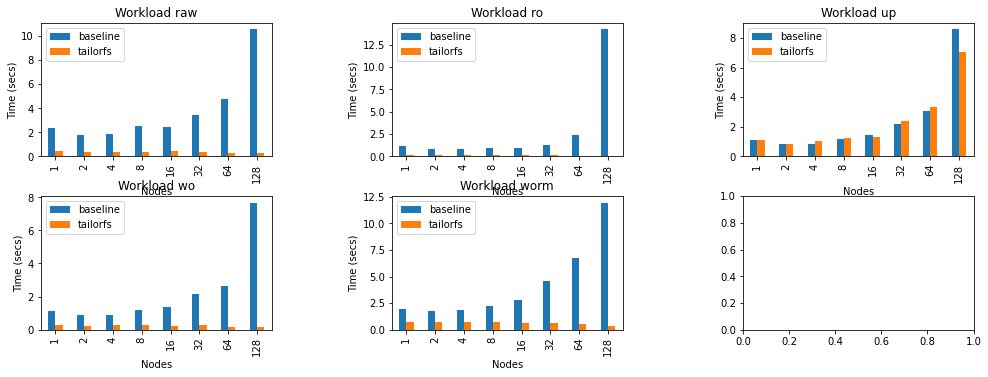

In [286]:
import matplotlib.pyplot as plt
import math
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.tight_layout()
for index,workload in enumerate(workloads):
    col = index % ncols
    row = math.floor(index / ncols)
    ax = final_df.loc[(slice(None), [workload],slice(None), slice(None),slice(None),[0])].plot.bar(ax=axes[row,col],x='nodes', y=['baseline','tailorfs'], title=f"Workload {workload}",figsize=(15, 5))
    ax.set_xlabel("Nodes")
    ax.set_ylabel("Time (secs)")
    

In [291]:
final_df.loc[(slice(None), ["worm"],slice(None), slice(None),slice(None),[1])]

,,,,,,nodes,tailorfs,baseline,improvement
nodes,workload,storage,access_pattern,file_sharing,process_grouping,,,,
1,worm,1,0,0,1,1,0.369786,0.963517,2.605607
2,worm,1,0,0,1,2,0.664710,2.346577,3.530227
4,worm,1,0,0,1,4,0.662996,1.942436,2.929785
8,worm,1,0,0,1,8,0.696103,2.200832,3.161647
16,worm,1,0,0,1,16,0.633358,2.097430,3.311603
32,worm,1,0,0,1,32,0.649184,2.629682,4.050750
64,worm,1,0,0,1,64,0.586813,6.519276,11.109631
128,worm,1,0,0,1,128,0.487418,10.487514,21.516468


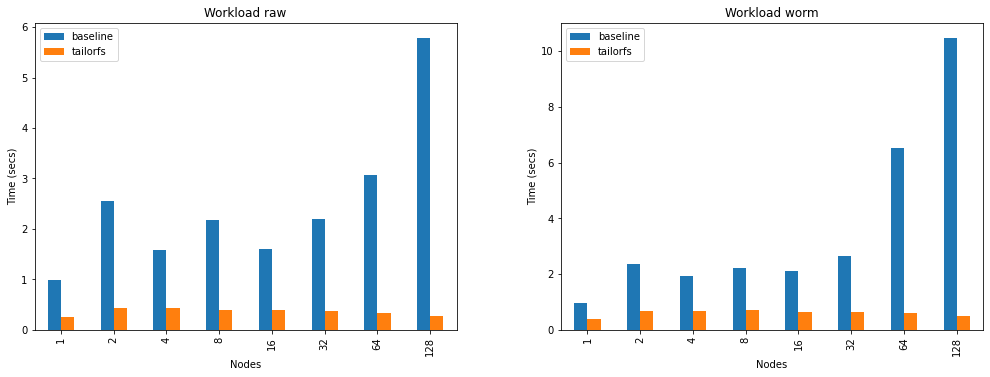

In [293]:
import matplotlib.pyplot as plt
import math
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.tight_layout()
index = 0
for workload in workloads:
    if workload == "raw" or workload == "worm":
        col = index % ncols
        row = math.floor(index / ncols)
        ax = final_df.loc[(slice(None), [workload],slice(None), slice(None),slice(None),[1])].plot.bar(ax=axes[col],x='nodes', y=['baseline','tailorfs'], title=f"Workload {workload} Split",figsize=(15, 5))
        ax.set_xlabel("Nodes")
        ax.set_ylabel("Time (secs)")
        index = index + 1
    

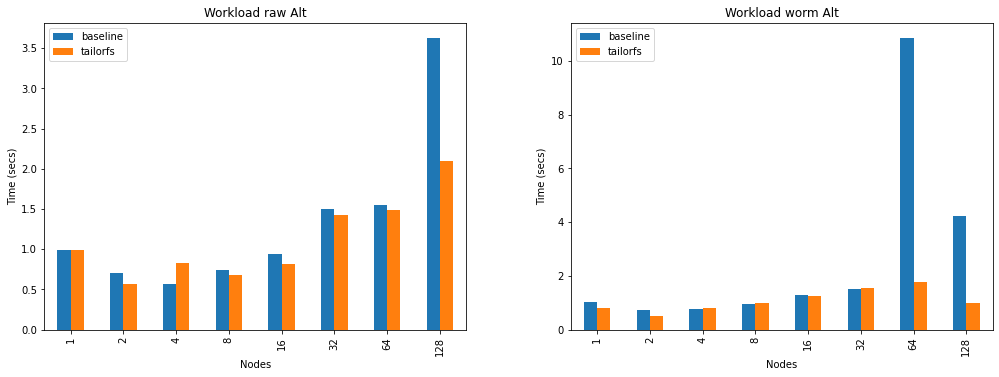

In [294]:
import matplotlib.pyplot as plt
import math
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.tight_layout()
index = 0
for workload in workloads:
    if workload == "raw" or workload == "worm":
        col = index % ncols
        row = math.floor(index / ncols)
        ax = final_df.loc[(slice(None), [workload],slice(None), slice(None),slice(None),[2])].plot.bar(ax=axes[col],x='nodes', y=['baseline','tailorfs'], title=f"Workload {workload} Alt",figsize=(15, 5))
        ax.set_xlabel("Nodes")
        ax.set_ylabel("Time (secs)")
        index = index + 1
    